In [24]:
import os

for dir_path,dir_names,file_names in os.walk("our_data"):
  print(f"There are {len(dir_names)} directories in {len(file_names)} images in {dir_path}")

There are 2 directories in 0 images in our_data
There are 3 directories in 0 images in our_data\test
There are 0 directories in 10 images in our_data\test\jeeswan
There are 0 directories in 10 images in our_data\test\krisha
There are 0 directories in 10 images in our_data\test\suyesh
There are 3 directories in 0 images in our_data\train
There are 0 directories in 40 images in our_data\train\jeeswan
There are 0 directories in 40 images in our_data\train\krisha
There are 0 directories in 40 images in our_data\train\suyesh


In [25]:
# Setup the train and test_directories
train_dir ="our_data/train/"
test_dir ="our_data/test/"


In [26]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name.strip() for item in data_dir.glob('*')]))
print(class_names)

['jeeswan' 'krisha' 'suyesh']


In [27]:
# Creating a function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['Suyesh_33.jpg']
Image shape: (182, 182, 3)


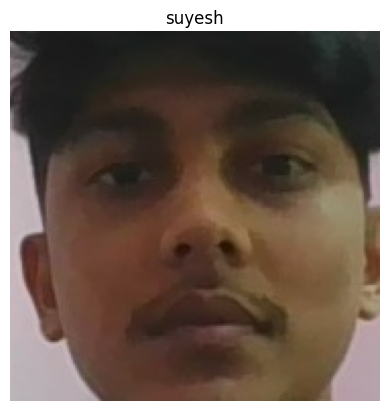

In [28]:
# visualize
import random
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [30]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu",
                    input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="softmax")
])
model1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history1= model1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 469ms/step - accuracy: 0.6059 - loss: 0.9234 - val_accuracy: 1.0000 - val_loss: 0.5145
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.9740 - loss: 0.4451 - val_accuracy: 1.0000 - val_loss: 0.1781
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 1.0000 - loss: 0.1466 - val_accuracy: 1.0000 - val_loss: 0.0587
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 1.0000 - loss: 0.0431 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0031


In [31]:
import pandas as pd
def plot_loss_curves(history):
  loss=history.history["loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  val_loss=history.history["val_loss"]

  epochs = range(len(history.history["loss"]))
  #Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

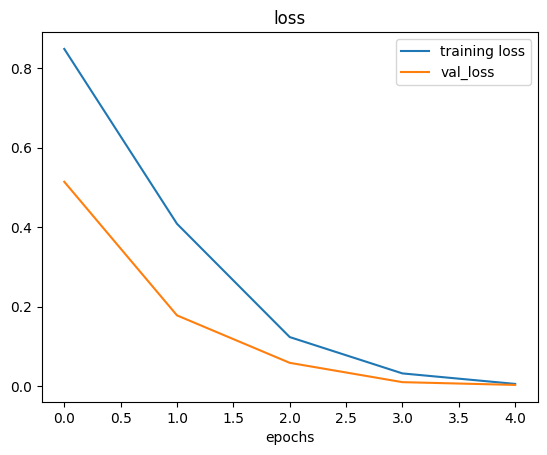

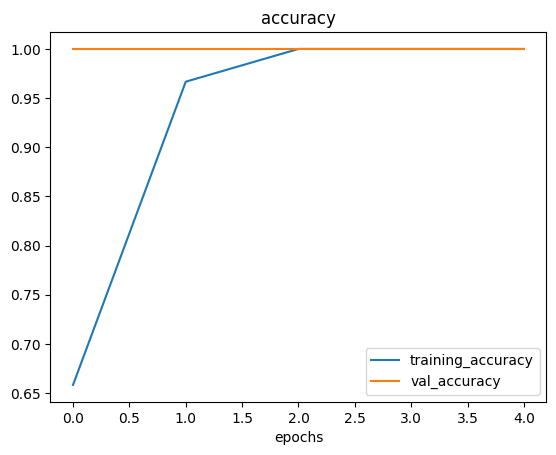

In [32]:
plot_loss_curves(history1)

In [33]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu",
                    input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="softmax")
])

model2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history2= model2.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.3577 - loss: 1.1239 - val_accuracy: 0.6667 - val_loss: 0.5003
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.7929 - loss: 0.4229 - val_accuracy: 1.0000 - val_loss: 0.1403
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 1.0000 - loss: 0.1053 - val_accuracy: 1.0000 - val_loss: 0.0476
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 1.0000 - loss: 0.0343 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0024


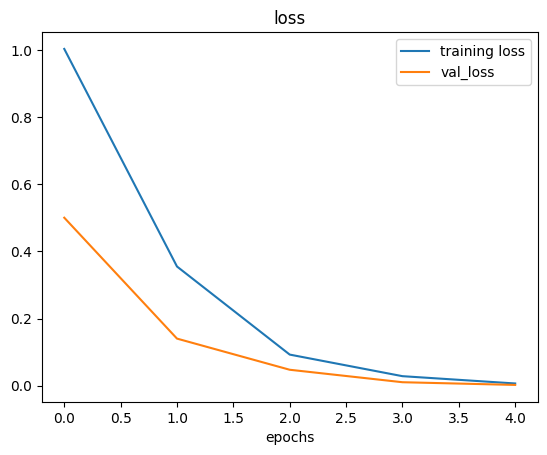

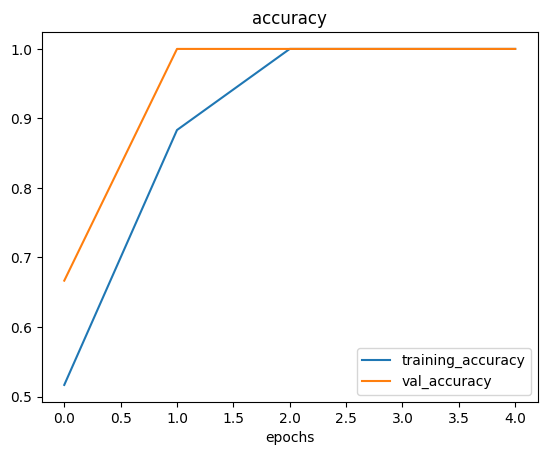

In [34]:
plot_loss_curves(history2)

In [35]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   target_size=(224,224))

Found 120 images belonging to 3 classes.


In [36]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu",
                    input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="softmax")
])

model3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history3= model3.fit(train_data_augmented,
                     epochs=5,
                     steps_per_epoch=len(train_data_augmented),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2636 - loss: 1.1014 - val_accuracy: 0.4667 - val_loss: 1.0533
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 903ms/step - accuracy: 0.5470 - loss: 1.0522 - val_accuracy: 0.6667 - val_loss: 0.9776
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 877ms/step - accuracy: 0.5959 - loss: 0.9760 - val_accuracy: 0.9333 - val_loss: 0.8799
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 699ms/step - accuracy: 0.7981 - loss: 0.8945 - val_accuracy: 1.0000 - val_loss: 0.7292
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 708ms/step - accuracy: 0.9390 - loss: 0.7285 - val_accuracy: 1.0000 - val_loss: 0.5520


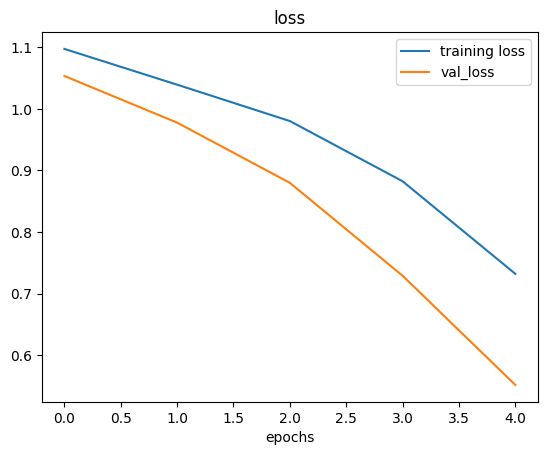

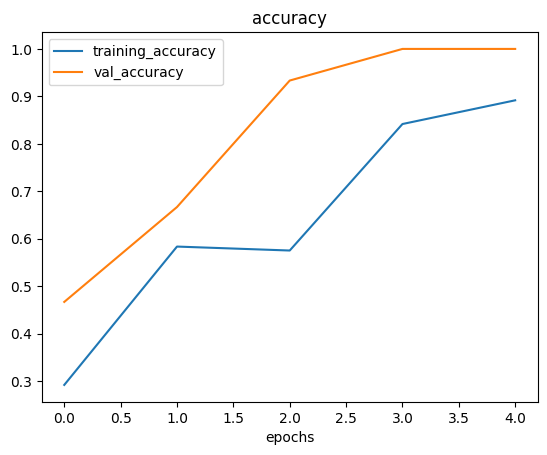

In [37]:
plot_loss_curves(history3)

In [38]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [39]:
def pred_and_plot(model, filename, class_names=class_names, confidence_threshold=0.6):
    """
    Imports image, makes prediction, extracts ID, plots image with predicted class.
    Returns predicted ID or None if confidence too low.
    """
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_probs = pred[0]
    
    max_confidence = tf.reduce_max(pred_probs).numpy()
    if max_confidence < confidence_threshold:
        pred_class = "Unknown"
        predicted_id = None
    else:
        pred_class = class_names[tf.argmax(pred_probs)]
        # Assuming ID is always the second element when split by '$'
        predicted_id = pred_class.split('$')[1] if '$' in pred_class else None

    # Plotting
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class} ({max_confidence:.2f})")
    plt.axis(False)
    plt.show()

    return predicted_id

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


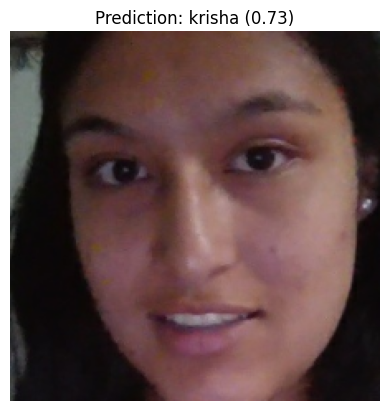

In [40]:
pred_and_plot(model3,r"D:\FInal Year project\Face-Recognition-Attendance-System\model\our_data\test\krisha\subject_41.jpg",class_names=class_names)

In [41]:
model3.save('static/face_recognition_model.h5')